# **Ordinary Differential Equation Solving**

Author : Rakshit Kr. Singh : [Website](https://blog.greatrsingh.in/) : [LinkedIn](https://www.linkedin.com/in/rakshit-singh-ai/) : [GitHub](https://github.com/GreatRSingh)

Ordinary Differential Equations (ODEs) are a cornerstone of mathematical modeling, essential for understanding dynamic systems in various scientific and engineering fields.

This tutorial aims to introduce you to ODE solving tools in DeepChem.

## What are Ordinary Differential Equations?

An ordinary differential equation (ODE) is a type of differential equation that depends on a single independent variable. In contrast to partial differential equations (PDEs), which involve multiple independent variables, ODEs focus on relationships where changes occur with respect to just one variable. The term "ordinary" distinguishes these equations from stochastic differential equations (SDEs), which incorporate random processes.

ODEs consist of unknown functions and their derivatives, establishing relationships that describe how a quantity changes over time or space. These equations are fundamental in expressing the dynamics of systems.

### General  Form of an ODE -

$$\frac{dy}{dx} = f(x,y)$$

Here,
$dy/dx$ is the derivative of $y$ with regards to $x$, and $f(x,y)$ is a function of $x$ and $y$.

### Why we should Care About Ordinary Differential Equations

They are essential because they model how physical quantities change over time. ODEs are used in:

- Physics: To describe the motion of particles, the evolution of wave functions, and more.

- Engineering: To design control systems, signal processing, and electrical circuits.

- Biology: To model population dynamics, the spread of diseases, and biological processes.

- Economics: To analyze growth models, market equilibrium, and financial systems.

- Control Systems and Robotics: In control systems and robotics, ODEs are fundamental in describing the dynamics of systems.

## Methods for Solving ODEs in DeepChem

DeepChem boasts a number of methods for solving ODEs. Some of them are:

- Euler's Method
- Mid Point Method
- 3/8 Method
- RK-4 Method

#### Euler's Method (1st Order Runge Kutta Method)

- It is the simplest Runge–Kutta method
- Explicit Runge–Kutta method with one stage

$$y_{n+1}=y_{n}+hf(t_{n},y_{n})$$


#### Mid-Point Method (2nd Order Runge Kutta Method)

- It is also called modified Euler's method
- second-order method with two stages

$$y_{n+1}=y_{n}+hf\left(t_{n}+{\frac {1}{2}}h,y_{n}+{\frac {1}{2}}hf(t_{n},\ y_{n})\right)$$

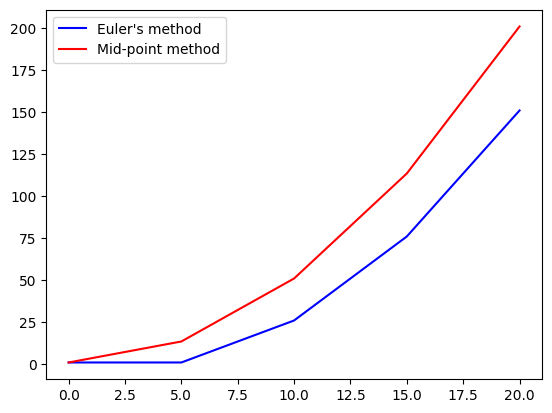

In [5]:
from deepchem.utils.differentiation_utils.integrate.explicit_rk import mid_point_ivp, fwd_euler_ivp
import matplotlib.pyplot as plt
import torch

# Simple ODE dy/dt = a*y
def ode(t, y, params):
    a = params[0]
    return y * a

t = torch.linspace(0, 20, 5)
y_0 = torch.tensor([1])
a = torch.tensor([1])

sol_fwd_euler = fwd_euler_ivp(ode, y_0, t, [a])
sol_mid_point = mid_point_ivp(ode, y_0, t, [a])

plt.plot(t, sol_fwd_euler, "-b", label="Euler's method")
plt.plot(t, sol_mid_point, "-r", label="Mid-point method")
plt.legend(loc="upper left")
plt.show()

### RK4 Method

$${\displaystyle {\begin{aligned}y_{n+1}&=y_{n}+{\frac {h}{6}}\left(k_{1}+2k_{2}+2k_{3}+k_{4}\right)\\t_{n+1}&=t_{n}+h\\\end{aligned}}}$$

for n = 0, 1, 2, 3, ...

$${\displaystyle {\begin{aligned}k_{1}&=\ f(t_{n},y_{n})\\k_{2}&=\ f\!\left(t_{n}+{\frac {h}{2}},y_{n}+h{\frac {k_{1}}{2}}\right)\\k_{3}&=\ f\!\left(t_{n}+{\frac {h}{2}},y_{n}+h{\frac {k_{2}}{2}}\right)\\k_{4}&=\ f\!\left(t_{n}+h,y_{n}+hk_{3}\right)\end{aligned}}}$$

#### Second Order Differential Equation

##### Example: $\frac{d^{2}y}{dt^{2}} + \frac{dy}{dt} - 6y = 0$
given, $y(0) = 5$ and $dy/dt$ at t=0 is -5

##### Procedure:
$$\frac{dy}{dt} = z$$
$$\frac{dz}{dt} = 6y - z$$

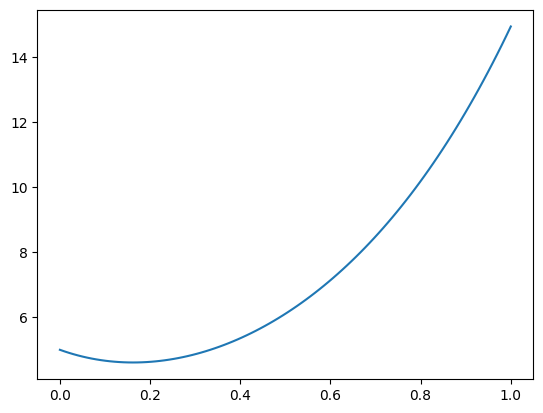

In [23]:
from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk4_ivp
import matplotlib.pyplot as plt
import torch

def sode(variables, t, params):
    y, z = variables

    a = params[0]

    dydt = z
    dzdt = a * y - z

    return torch.tensor([dydt, dzdt])

params = torch.tensor([6])
t = torch.linspace(0, 1, 100)
y0 = torch.tensor([5, -5])
sol = rk4_ivp(sode, y0, t, params)

plt.plot(t, sol[:, 0])
plt.show()

#### Comparing with Particular Solution

Particular Solution: $y = 2e^{2x} + 3e^{-3x}$

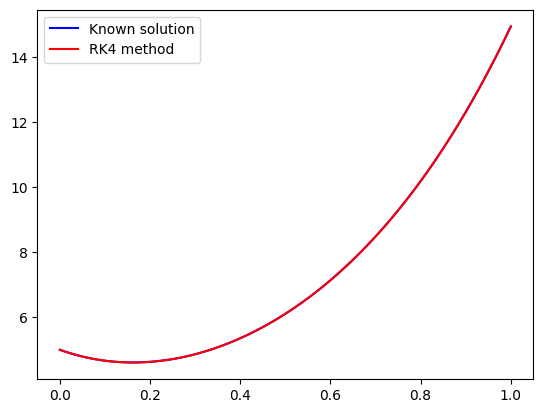

In [25]:
yy = 2 * torch.exp(2 * t) + 3 * torch.exp(-3 * t)

plt.plot(t, yy, "-b", label="Known solution")
plt.plot(t, sol[:, 0], "-r", label="RK4 method")
plt.legend(loc="upper left")
plt.show()

### Solving Lotka Volterra using Deepchem

The Lotka–Volterra equations, also known as the Lotka–Volterra predator–prey model, are a pair of first-order nonlinear differential equations, frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey. The populations change through time according to the pair of equations:

$${\displaystyle {\begin{aligned}{\frac {dx}{dt}}&=\alpha x-\beta xy,\\{\frac {dy}{dt}}&=-\gamma y+\delta xy,\end{aligned}}}$$

The Lotka–Volterra system of equations is an example of a Kolmogorov model, which is a more general framework that can model the dynamics of ecological systems with predator–prey interactions, competition, disease, and mutualism.

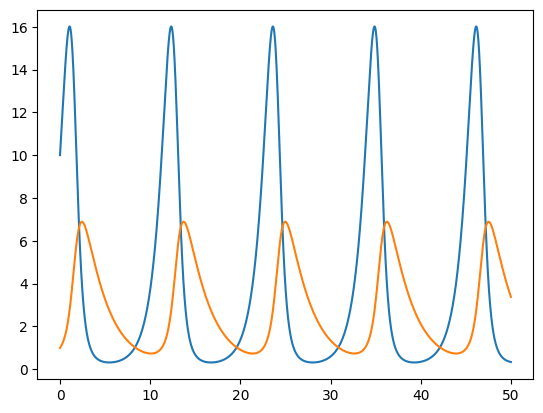

In [29]:
from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk38_ivp
import matplotlib.pyplot as plt
import torch

def lotka_volterra(y, x, params):
    y1, y2 = y
    a, b, c, d = params
    return torch.tensor([(a * y1 - b * y1 * y2), (c * y2 * y1 - d * y2)])

t = torch.linspace(0, 50, 10000)

solver_param = [lotka_volterra,
                torch.tensor([10., 1.]),
                t,
                torch.tensor([1.1, 0.4, 0.1, 0.4])]

sol_rk38 = rk38_ivp(*solver_param)

plt.plot(t, sol_rk38)

plt.show()

### lotka volterra (Parammeter Estimation)

Parameter Estimation is used to estimate the values of the changable parameters in the ODE. The parameters describe an underlying physical setting in such a way that their value affects the distribution of the measured data. An estimator attempts to approximate the unknown parameters using the measurements.

In [31]:
import pandas as pd

dataset = pd.read_csv('assets/population_data.csv')
years = torch.tensor(dataset['year'])
fish_pop = torch.tensor(dataset['fish_hundreds'])
bears_pop = torch.tensor(dataset['bears_hundreds'])

plt.plot(fish_pop)
plt.plot(bears_pop)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'assets/population_data.csv'

Optimization terminated successfully.
         Current function value: 42.135876
         Iterations: 155
         Function evaluations: 256


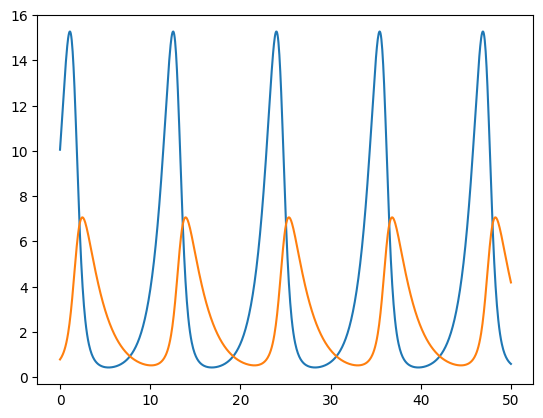

In [32]:
from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk4_ivp
from deepchem.utils.differentiation_utils.optimize.equilibrium import anderson_acc
import torch
import matplotlib.pyplot as plt


def lotka_volterra(y, x, params):
    y1, y2 = y
    a, b, c, d = params

    return torch.tensor([a * y1 - b * y1 * y2, c * y2 * y1 - d * y2])


def loss_function(params, years,fish_pop, bears_pop):

    y0 = torch.tensor([fish_pop[0], bears_pop[0]])

    t = torch.linspace(years[0], years[-1], len(years))

    output = rk4_ivp(lotka_volterra, t, y0, params)

    loss = 0

    for i in range(len(years)):
        data_fish = fish_pop[i]
        model_fish = output[i,0]

        data_bears = bears_pop[i]
        model_bears = output[i,1]

        res = (data_fish - model_fish)**2 + (data_bears - model_bears)**2

        loss += res

    return(loss)

import scipy.optimize

params0 = torch.tensor([1.1, .4, .1, .4])
minimum = scipy.optimize.fmin(loss_function, params0, args=(years,fish_pop, bears_pop))


alpha_fit = minimum[0]
beta_fit = minimum[1]
delta_fit = minimum[2]
gamma_fit = minimum[3]

params = torch.tensor([alpha_fit, beta_fit, delta_fit, gamma_fit])

y0 = torch.tensor([fish_pop[0], bears_pop[0]])

t = torch.linspace(years[0], years[-1], 1000)

output = rk4_ivp(lotka_volterra, t, y0, params)

plt.plot(t, output)
plt.show()

## SIR Epidemiology

The SIR model is one of the simplest compartmental models, and many models are derivatives of this basic form. The model consists of three compartments:

- S: The number of susceptible individuals. When a susceptible and an infectious individual come into "infectious contact", the susceptible individual contracts the disease and transitions to the infectious compartment.
- I: The number of infectious individuals. These are individuals who have been infected and are capable of infecting susceptible individuals.
- R: The number of removed (and immune) or deceased individuals. These are individuals who have been infected and have either recovered from the disease and entered the removed compartment, or died. It is assumed that the number of deaths is negligible with respect to the total population. This compartment may also be called "recovered" or "resistant".

$$\frac{dS}{dt} = \frac{-\beta IS}{N}$$
$$\frac{dI}{dt} = \frac{\beta IS}{N} - \gamma I$$
$$\frac{dR}{dt} = \gamma I$$
$$N = S + I + R$$
$$R_{0} = \frac{\beta}{\gamma}$$

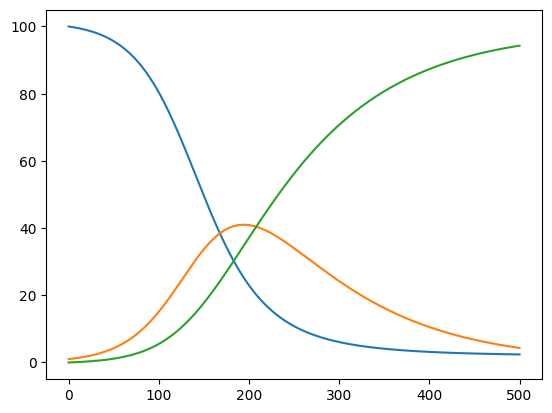

In [16]:
import torch
import matplotlib.pyplot as plt
from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk4_ivp

def sim(variables, t, params):
    S, I, R = variables

    N = S + I + R

    beta, gamma = params

    dSdt = - beta * I * S / N
    dIdt = beta * I * S / N - gamma * I
    dRdt = gamma * I

    return torch.tensor([dSdt, dIdt, dRdt])

t = torch.linspace(0, 500, 1000)

beta = 0.04
gamma = 0.01

params = torch.tensor([beta, gamma])

y0 = torch.tensor([100, 1, 0])

y = rk4_ivp(sim, y0, t, params)

plt.plot(t, y)
plt.show()

## SIS Model

Some infections, for example, those from the common cold and influenza, do not confer any long-lasting immunity. Such infections may give temporary resistance but do not give long-term immunity upon recovery from infection, and individuals become susceptible again. 

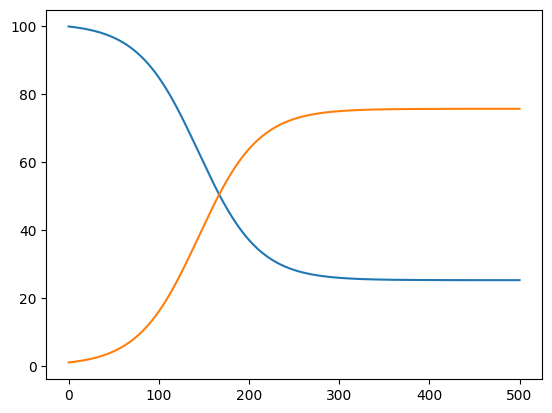

In [17]:
import torch
import matplotlib.pyplot as plt
from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk4_ivp

def sim(variables, t, params):
    S, I = variables

    N = S + I

    beta, gamma = params

    dSdt = - beta * I * S / N + gamma * I
    dIdt = beta * I * S / N - gamma * I

    return torch.tensor([dSdt, dIdt])

t = torch.linspace(0, 500, 1000)

beta = 0.04
gamma = 0.01

params = torch.tensor([beta, gamma])

y0 = torch.tensor([100, 1])

y = rk4_ivp(sim, y0, t, params)

plt.plot(t, y)
plt.show()

## SEIR Model

For many important infections, there is a significant latency period during which individuals have been infected but are not yet infectious themselves. During this period the individual is in compartment E (for exposed).

In [ ]:
import torch
import matplotlib.pyplot as plt
from deepchem.utils.differentiation_utils.integrate.explicit_rk import rk4_ivp

def sim(variables, t, params):
    S, I = variables

    N = S + I

    beta, gamma = params

    dSdt = - beta * I * S / N + gamma * I
    dIdt = beta * I * S / N - gamma * I

    return torch.tensor([dSdt, dIdt])

t = torch.linspace(0, 500, 1000)

beta = 0.04
gamma = 0.01

params = torch.tensor([beta, gamma])

y0 = torch.tensor([100, 1])

y = rk4_ivp(sim, y0, t, params)

plt.plot(t, y)
plt.show()

## References

1. More Computational Biology and Python by Mike Saint-Antoine https://www.youtube.com/playlist?list=PLWVKUEZ25V97W2qS7faggHrv5gdhPcgjq

2. Compartmental models in epidemiology. (2024, May 27). In Wikipedia. https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology

3. Runge–Kutta methods. (2024, June 1). In Wikipedia. https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods

## Citing This Tutorial

If you found this tutorial useful please consider citing it using the provided BibTeX.

```bibtex
@manual{Quantum Chemistry, 
 title={Differentiation Infrastructure in Deepchem}, 
 organization={DeepChem},
 author={Singh, Rakshit kr.},
 howpublished = {\url{https://github.com/deepchem/deepchem/blob/master/examples/tutorials/ODE_Solving.ipynb}}, 
 year={2024}, 
} 
```

# Congratulations! Time to join the Community!

Congratulations on completing this tutorial notebook! If you enjoyed working through the tutorial, and want to continue working with DeepChem, we encourage you to finish the rest of the tutorials in this series. You can also help the DeepChem community in the following ways:

## Star DeepChem on [GitHub](https://github.com/deepchem/deepchem)
This helps build awareness of the DeepChem project and the tools for open source drug discovery that we're trying to build.


## Join the DeepChem Discord
The DeepChem [Discord](https://discord.gg/SxSzjRRDMA) hosts a number of scientists, developers, and enthusiasts interested in deep learning for the life sciences. Join the conversation!